In [1]:
from datetime import date
from datetime import datetime,date
import time
import pandas as pd
import numpy as np
import statistics as st
from dateutil import parser

In [2]:
def toDate(epoch_time):
    return datetime.fromtimestamp(epoch_time)

In [3]:
df=pd.read_json('/home/ubuntu/Documents/paphosWeather/paphosWeather.json',lines=True)

In [4]:
'''
temps=[]
row=len(df.index)
    
for i in (range(0,row)):
    temps.append(df["main"][i]["temp"])
'''

'\ntemps=[]\nrow=len(df.index)\n    \nfor i in (range(0,row)):\n    temps.append(df["main"][i]["temp"])\n'

In [24]:
df.index

RangeIndex(start=0, stop=181464, step=1)

In [5]:
df['temp']=df["main"].map(lambda x: x["temp"])

In [21]:
df['temp']

0         55.35
1         55.38
2         55.67
3         54.09
4         54.39
5         53.19
6         54.21
7         59.92
8         64.83
9         65.97
10        65.70
11        65.82
12        65.77
13        64.51
14        63.00
15        61.86
16        61.23
17        59.92
18        57.63
19        56.26
20        56.97
21        55.11
22        54.77
23        53.26
24        53.92
25        54.21
26        54.12
27        54.43
28        53.29
29        53.64
          ...  
181434    79.57
181435    79.07
181436    77.11
181437    75.79
181438    75.33
181439    74.08
181440    73.81
181441    73.47
181442    73.40
181443    73.40
181444    74.03
181445    78.84
181446    80.98
181447    83.88
181448    85.39
181449    86.49
181450    87.53
181451    87.84
181452    86.34
181453    87.49
181454    85.28
181455    83.41
181456    82.08
181457    79.52
181458    78.87
181459    78.10
181460    76.32
181461    75.34
181462    74.52
181463    73.67
Name: temp, Length: 1814

In [6]:
year=[]
month=[]
row=len(df.index)
for j in range(0,row):
    date=df["dt_iso"][j]
    onlyDate=date[:len(date)-19]
    year.append(onlyDate[0:4])
    month.append(int(onlyDate[5:7]))
    
    
month=np.asarray(month)
year=np.asarray(year)

In [7]:
#monthYear=pd.DataFrame({'year':[year], 'month':[month],'temperature':[temps]})

In [8]:
monthYear=pd.DataFrame(year,columns=['year'])
monthYear['month']=pd.DataFrame(month)
monthYear['temp']=df["temp"]

In [9]:
monthYear.astype('float').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181464 entries, 0 to 181463
Data columns (total 3 columns):
year     181464 non-null float64
month    181464 non-null float64
temp     181464 non-null float64
dtypes: float64(3)
memory usage: 4.2 MB


In [10]:
globalWarming=monthYear.groupby(['year','month']).mean()

In [23]:
globalWarming.index

MultiIndex(levels=[['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 1

Now answer the question.  Is there global warming in Paphos?

In [11]:
globalWarming.index

MultiIndex(levels=[['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 1

In [12]:
columnWarming=globalWarming.reset_index()
columnWarming['temp']=columnWarming["temp"].map(lambda x: np.round(x,2))
columnWarming

,year,month,temp
0,2000,1,52.69
1,2000,2,54.23
2,2000,3,55.87
3,2000,4,63.47
4,2000,5,69.01
5,2000,6,77.67
6,2000,7,81.62
7,2000,8,80.74
8,2000,9,77.31
9,2000,10,71.02


In [13]:
columnWarming.index

RangeIndex(start=0, stop=249, step=1)

In [14]:
work=columnWarming.astype('float') 
work.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 3 columns):
year     249 non-null float64
month    249 non-null float64
temp     249 non-null float64
dtypes: float64(3)
memory usage: 5.9 KB


In [15]:
work.corr(method ='kendall') 


,year,month,temp
year,1.000000,-0.018645,0.028954
month,-0.018645,1.000000,0.335532
temp,0.028954,0.335532,1.000000


In [16]:
january=columnWarming.loc[columnWarming['month'] == 1]
january

,year,month,temp
0,2000,1,52.69
12,2001,1,55.94
24,2002,1,52.96
36,2003,1,58.44
48,2004,1,54.82
60,2005,1,56.13
72,2006,1,54.90
84,2007,1,55.04
96,2008,1,52.97
108,2009,1,57.76


In [26]:
pol=np.polyfit(np.array(january['year'].astype('float') ),np.array(january['temp']),1)

In [39]:
january

,year,month,temp
0,2000,1,52.69
12,2001,1,55.94
24,2002,1,52.96
36,2003,1,58.44
48,2004,1,54.82
60,2005,1,56.13
72,2006,1,54.90
84,2007,1,55.04
96,2008,1,52.97
108,2009,1,57.76


In [48]:
m=pol[0]
b=pol[1]

#work=pd.DataFrame([january['year'],january['temp']])
work=pd.DataFrame({'year':january['year'], 'temperature':january['temp']})
work

,temperature,year
0,52.69,2000
12,55.94,2001
24,52.96,2002
36,58.44,2003
48,54.82,2004
60,56.13,2005
72,54.90,2006
84,55.04,2007
96,52.97,2008
108,57.76,2009


In [62]:
work['year']=work['year'].astype('float')

In [63]:
work.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 0 to 240
Data columns (total 2 columns):
temperature    21 non-null float64
year           21 non-null float64
dtypes: float64(2)
memory usage: 1.1 KB


In [64]:
work['prediction']=work['year'].map(lambda l : ( m * l ) + b)

In [65]:
work

,temperature,year,prediction
0,52.69,2000.0,55.316710
12,55.94,2001.0,55.328372
24,52.96,2002.0,55.340035
36,58.44,2003.0,55.351697
48,54.82,2004.0,55.363359
60,56.13,2005.0,55.375022
72,54.90,2006.0,55.386684
84,55.04,2007.0,55.398346
96,52.97,2008.0,55.410009
108,57.76,2009.0,55.421671


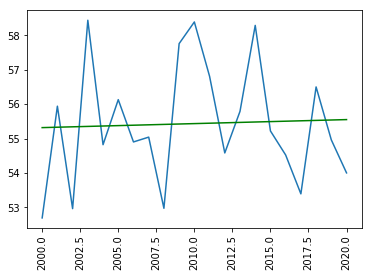

In [72]:
import matplotlib.pyplot as plt

plt.xticks(rotation=90)
plt.plot(work['year'],work['temperature'])
plt.plot(work['year'],work['prediction'],color='g')
plt.show()

In [73]:
m

0.011662337662332347